In [1]:
from mpl_toolkits.mplot3d import Axes3D
%pylab
import scipy as sc, sympy, numpy, pylab
from scipy import optimize
from sympy.vector import CoordSys3D, gradient
import IPython.display as disp

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
sympy.init_printing()

In [3]:
def makeData():
	x = numpy.arange(-5, 5, 0.01)
	y = numpy.arange(-5, 5, 0.01)
	xgrid, ygrid = numpy.meshgrid(x, y)
	zgrid = func(xgrid, ygrid)
	return xgrid, ygrid, zgrid

In [4]:
def func(x1, x2):
	return (numpy.sin(x1) * numpy.cos(x2)) / (2 * x1)

In [5]:
def func1(x):
	return func(*x)

In [6]:
x, y, z = makeData()

In [7]:
begin = (0.1, 0.2)
res = optimize.minimize(func1, x0=begin)
print(res.fun)

-0.4999999999346162


In [8]:
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, z, color='green', alpha=0.2)

axes.scatter3D(begin[0], begin[1], func(begin[0], begin[1]), s=100, color='blue')
axes.scatter3D(res.x[0], res.x[1], func(res.x[0], res.x[1]), s=100, color='red')

In [9]:
R = CoordSys3D('')
gradX, gradY = sympy.symbols(('x y'))
s1 = ((sympy.sin(R.x) * sympy.cos(R.y)) / (2 * R.x))
print(gradient(s1))

(cos(.x)*cos(.y)/(2*.x) - sin(.x)*cos(.y)/(2*.x**2))*.i + (-sin(.x)*sin(.y)/(2*.x))*.j


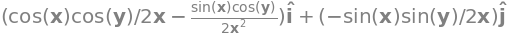

In [10]:
disp.display(gradient(s1))